In [27]:
## Standard Imports
import numpy as np
import pandas as pd
import os,json
import matplotlib.pyplot as plt


# Display all columns
pd.set_option('display.max_column', None)

from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
# Read in superhero_info
superhero_info_url ="superhero_info - superhero_info.csv"

superhero_info_df = pd.read_csv(superhero_info_url,  low_memory=False)
superhero_info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
# Read in superhero_powers 
superhero_powers_url ="superhero_powers - superhero_powers.csv"

superhero_powers_df = pd.read_csv(superhero_powers_url,  low_memory=False)
superhero_powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


***Transforming superhero_info***

*Separate Hero name and Publisher into 2 columns*

In [4]:
superhero_info_df['Hero'] = superhero_info_df['Hero|Publisher'].str.split('|').str[0]
superhero_info_df['Publisher'] = superhero_info_df['Hero|Publisher'].str.split('|').str[1]
superhero_info_df = superhero_info_df.drop(columns=['Hero|Publisher'])
superhero_info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


*Convert Measurements Columns into Height and Weight columns*

In [5]:
## use .str.replace to replace all single quotes
superhero_info_df['Measurements'] = superhero_info_df['Measurements'].str.replace("'",'"')

## Apply the json.loads to the full column
superhero_info_df['Measurements'] = superhero_info_df['Measurements'].apply(json.loads)
superhero_info_df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [6]:
## check a single value after transformation
test_measurements= superhero_info_df.loc[0, 'Measurements']
print(type(test_measurements))
test_measurements

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [7]:
# Extracting 'Measurements' column from the 'superhero_info_df' DataFrame and applying the 'pd.Series' function
Measurements = superhero_info_df['Measurements'].apply(pd.Series)
Measurements


,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [8]:
# concat Height and weight with original dataframe
superhero_info_df = pd.concat((superhero_info_df, Measurements), axis = 1)
superhero_info_df.head(2)


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [9]:
superhero_info_df = superhero_info_df.drop(columns=['Measurements'])
superhero_info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


*Remove 'kg' and 'cm' from the 'Height' and 'Weight' columns*

In [10]:
superhero_info_df['Height'] = pd.to_numeric(superhero_info_df['Height'].str.replace(' cm', ''), errors='coerce')
superhero_info_df['Weight'] = pd.to_numeric(superhero_info_df['Weight'].str.replace(' kg', ''), errors='coerce')

superhero_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [11]:
superhero_info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


***Transforming superhero_powers***

*Convert a column that contains lists (Powers)*

In [12]:
# Read in superhero_powers 
superhero_powers_url ="superhero_powers - superhero_powers.csv"

superhero_powers_df = pd.read_csv(superhero_powers_url)
superhero_powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [13]:
## showing the lists are really strings
superhero_powers_df.loc[2,'Powers']

'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner'

In [16]:
superhero_powers_df['Powers_spilt'] = superhero_powers_df['Powers'].str.split(',')
superhero_powers_df.head()

,hero_names,Powers,Powers_spilt
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [17]:
superhero_powers_df['Powers_spilt'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [18]:
## examining a single value from the coordinates col
powers = superhero_powers_df.loc[0,"Powers_spilt"]
print(type(powers))
powers


<class 'list'>


['Agility', 'Super Strength', 'Stamina', 'Super Speed']

In [19]:
## exploding the column of lists
exploded = superhero_powers_df.explode('Powers_spilt')
exploded[['hero_names','Powers','Powers_spilt']].head(5)



,hero_names,Powers,Powers_spilt
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [20]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers_spilt'].dropna().unique()
cols_to_make



array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [21]:
for col in cols_to_make:
    superhero_powers_df[col] = superhero_powers_df['Powers'].str.contains(col)
superhero_powers_df.head()



/var/folders/kr/kml98y6s65sb66zmrh8smyf80000gn/T/ipykernel_10384/1244670621.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  superhero_powers_df[col] = superhero_powers_df['Powers'].str.contains(col)
/var/folders/kr/kml98y6s65sb66zmrh8smyf80000gn/T/ipykernel_10384/1244670621.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  superhero_powers_df[col] = superhero_powers_df['Powers'].str.contains(col)
/var/folders/kr/kml98y6s65sb66zmrh8smyf80000gn/T/ipykernel_10384/1244670621.py:2: PerformanceWarning: DataFrame is highly fragme

,hero_names,Powers,Powers_spilt,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

***Combine Data***

In [22]:
superhero_combined_df = pd.merge(superhero_info_df, superhero_powers_df, left_on='Hero', right_on='hero_names', how='inner')
superhero_combined_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,hero_names,Powers,Powers_spilt,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,False,False,True,True,Tr

***Analysis***

In [25]:
# Compare the average weight of heroes with and without Super Speed
avg_weight_super_speed = superhero_combined_df.groupby('Super Speed')['Weight'].mean()

# Calculate the average height of heroes for each publisher
avg_height_publisher = superhero_combined_df.groupby('Publisher')['Height'].mean()


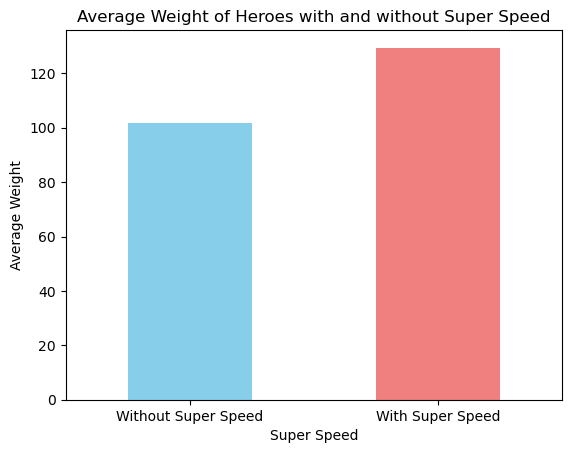

In [28]:
# Plotting average weight of heroes with and without Super Speed
avg_weight_super_speed.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Weight of Heroes with and without Super Speed')
plt.xlabel('Super Speed')
plt.ylabel('Average Weight')
plt.xticks([0, 1], ['Without Super Speed', 'With Super Speed'], rotation=0)
plt.show()


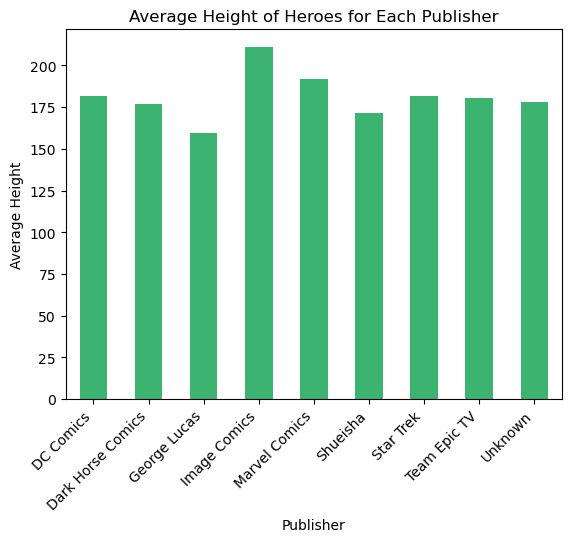

In [29]:
# Plotting average height of heroes for each publisher
avg_height_publisher.plot(kind='bar', color='mediumseagreen')
plt.title('Average Height of Heroes for Each Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Height')
plt.xticks(rotation=45, ha='right')
plt.show()